In [17]:
!sudo apt update
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [43.2 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Packa

In [18]:
!pip install pytesseract

In [77]:
import numpy as np
import cv2
import pytesseract
from google.colab.patches import cv2_imshow
from PIL import Image
import re

In [26]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

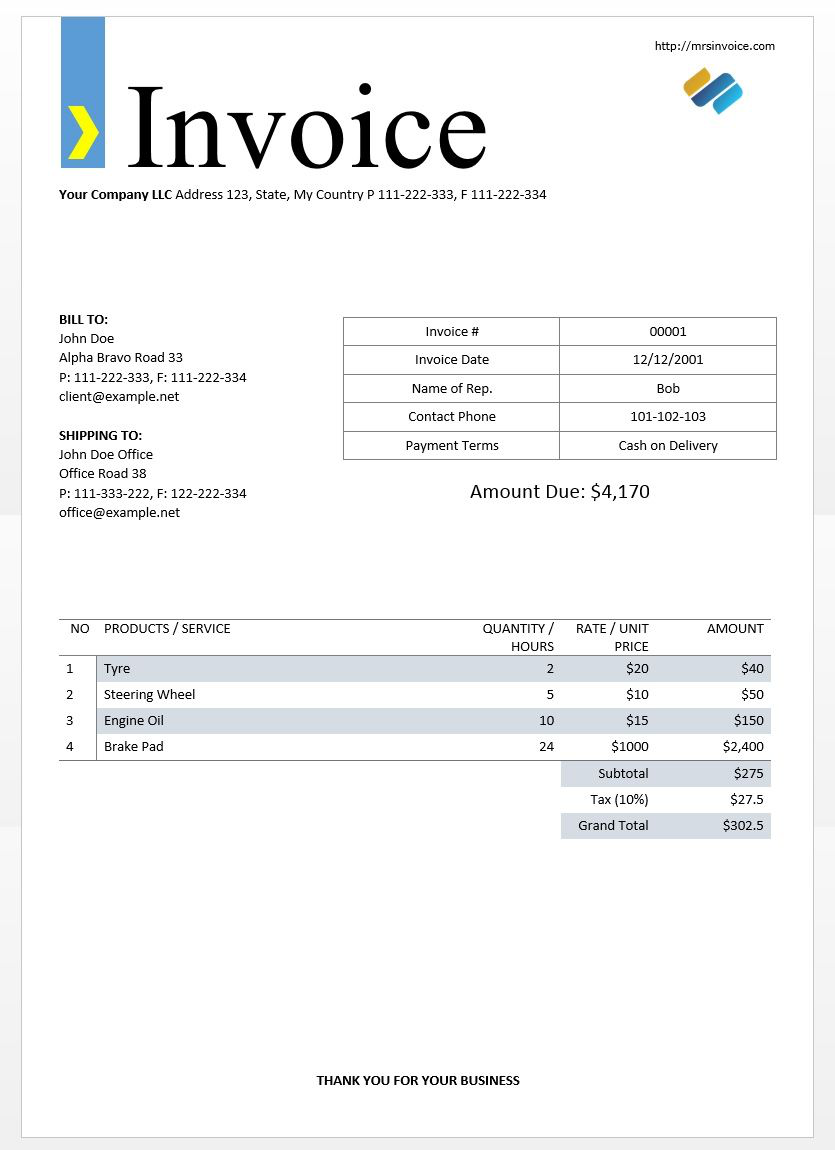

In [27]:
image = Image.open("invoice.jpg")
display(image)

In [28]:
text = pytesseract.image_to_string(image)

In [29]:
print(text)

’ Invoice

Your Company LLC Address 123, State, My Country P 111-222-333, F 111-222-334

BILL TO:
John Doe

‘Alpha Bravo Road 33

P: 111-222-333, F: 111-222-334
client@example.net

SHIPPING TO:
John Doe Office

Office Road 38,

P: 111-333-222, F: 122-222-834
office@example.net

http://mrsinvoice.com

 

 

 

 

 

Invoice # 00001
Invoice Date 12/12/2001
Name of Rep. Bob

Contact Phone 101-102-103

 

Payment Terms

 

 

Cash on Delivery

 

 

Amount Due: $4,170

 

 

 

 

NO PRODUCTS / SERVICE QUANTITY / RATE / UNIT AMOUNT
HOURS: PRICE

1 tye 2 $20 $40

2__| Steering Wheel 5 $10 $50

3 | Engine oil 10 $15 $150

4 | Brake Pad 24 $1000 $2,400

Subtotal $275

Tax (10%) $27.5

Grand Total $202.5

‘THANK YOU FOR YOUR BUSINESS



In [31]:
custom_config = r'--oem 3 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

http://mrsinvoice.com
I | 7
Your Company LLC Address 123, State, My Country P 111-222-333, F 111-222-334
BILL TO:
P: 111-222-333, F: 111-222-334 - 7
dient@eromplent
Contact Phone 101-102-103
john Doe office ayment Terms ‘ash on Delivery
Office Road 38
P: 111-333-222, F: 122-222-334 Amount Due: $4,170
office@example.net
NO PRODUCTS / SERVICE QUANTITY / RATE / UNIT AMOUNT
HOURS: PRICE
1 tye 2 $20 $40
2__| Steering Wheel 5 $10 $50
3 | Engine oil 10 $15 $150
4 | Brake Pad 24 $1000 $2,400
Subtotal $275
Tax (10%) $27.5
Grand Total $302.5
‘THANK YOU FOR YOUR BUSINESS



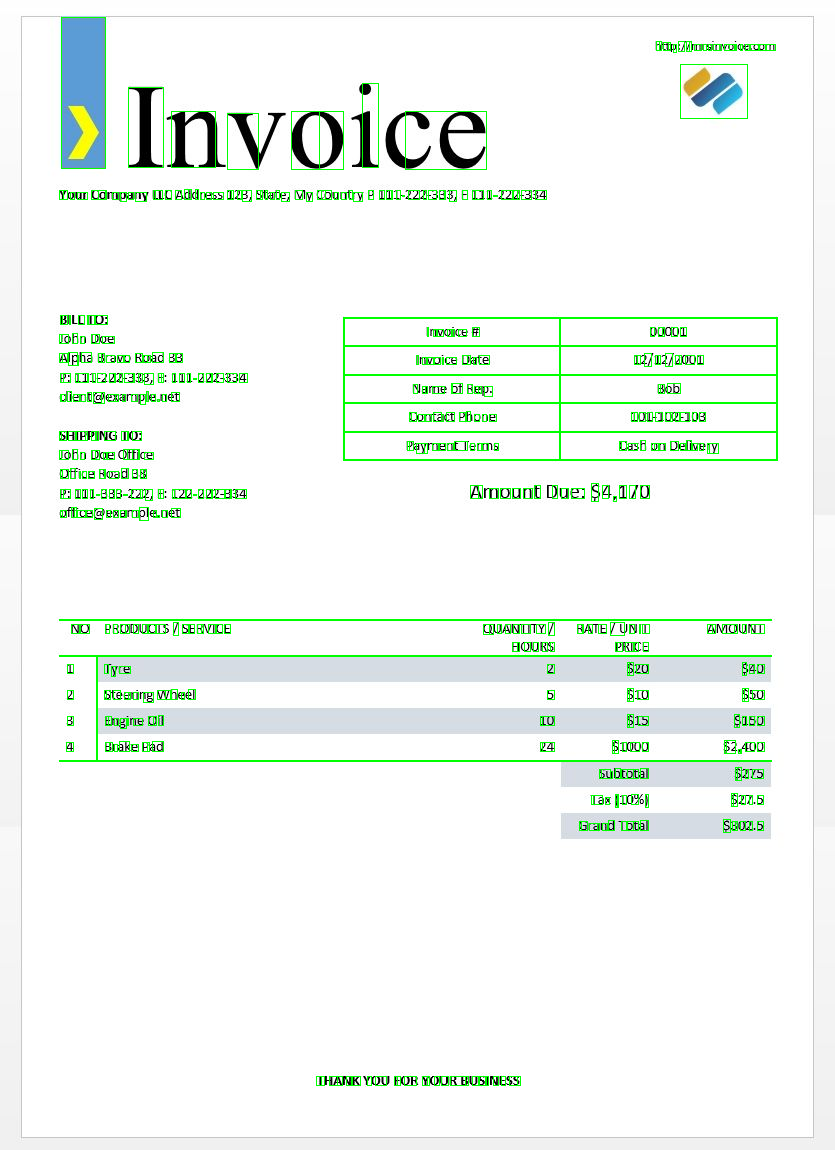

-1

In [35]:
# box around a letter

img = cv2.imread('invoice.jpg')
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 1)

cv2_imshow(img)
cv2.waitKey(0)

In [37]:
# boxes with words
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('invoice.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [58]:
(d["text"][3])

''

In [75]:
img = cv2.imread('invoice.jpg')
threshold = 40
for i in range(len(d['left'])):
  if int(d['conf'][i])>threshold:
    p1 = (d['left'][i], d['top'][i]) 
    p2 = (d['left'][i]+ d['width'][i], d['top'][i] + d['height'][i])
    p_text = (d['left'][i], d['top'][i] + d['height'][i]+10) 
    img = cv2.rectangle(img, p1, p2, (0,255,0),1)
    cv2.putText(img, d["text"][i], p_text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 1) #(img,bottomleft,text,font,size,color,thickness)
    #print(d['text'][i])

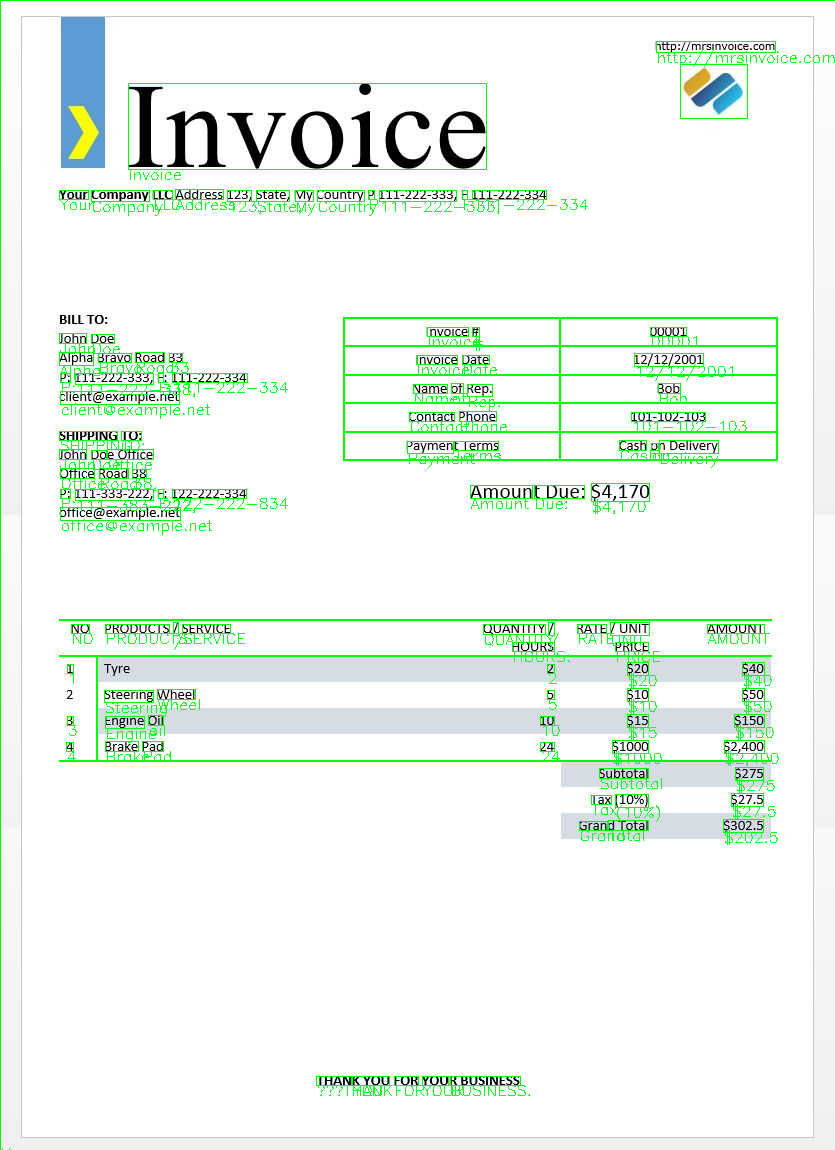

In [76]:
cv2_imshow(img)

In [94]:
# find the pattern
pattern = re.compile('\d{2}')

In [102]:
img = cv2.imread('invoice.jpg')
pattern = r'\d{3}-\d{3}-\d{3}'  # find phone number
threshold = 40
for i in range(len(d['left'])):
  if int(d['conf'][i])>threshold:
    if re.search(pattern, d['text'][i]):
      p1 = (d['left'][i], d['top'][i]) 
      p2 = (d['left'][i]+ d['width'][i], d['top'][i] + d['height'][i])
      p_text = (d['left'][i], d['top'][i] + d['height'][i]+10) 
      img = cv2.rectangle(img, p1, p2, (0,255,0),1)
      cv2.putText(img, d["text"][i], p_text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 1) #(img,bottomleft,text,font,size,color,thickness)
      print(d['text'][i])

111-222-333,
111-222-334
111-222-338,
111-222-334
111-383-222,
122-222-834
101-102-103


In [100]:
pattern = r'\d{2}-'
re.search(pattern, 'rt12-')

<_sre.SRE_Match object; span=(2, 5), match='12-'>